### Part2: Machine Learning Project : Supervised Learning - With Credit Card Data

<p>This project consist in apply a machine learning model with supervised learning.</p>

* <b>Data from </b>: handson-unsupervised-learning 
* <b>I'm using a independent enviroment with Python 3.6 version from Anaconda distribution</b>
* The libraries needed are:
    * tensorflow and keras.
    * lightgbm
    * fastcluster
    * hdbscan
    * tslearn


#### 1.- Overview of the data

It's a real dataset of anonymized credit card transactions made by European carholders from September 2013. Are labeled as fraudulent or genuine.

There are 28 features, all numerical, no categorial variables. (These features are the result from a Principal Components Analysis). Add three more variables: time of the transaction, the amount of the transaction, and the true class of the transaction: 0 -> genuine; 1 -> fraud

* Objective: Build a fraud detection solution.

#### <b>First Step</b>.- Call for the libraries needed

In [6]:
#Libraries
    #main
import imp
from multiprocessing import current_process
import numpy as np
import pandas as pd
import os
    #For visualization
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl
%matplotlib inline
    #data preparation
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve,auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
    #algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

#### <b>Second step</b>.- Import the dataset

In [15]:
# Data Acquisition

    # Read the data 
current_path = os.getcwd()
print(current_path)
file ="\datasets\credit_card_data\credit_card.csv"
data = pd.read_csv(current_path+file)

data.head()




d:\OpenBootcamp\Python\concepts_for_machine_learning


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### <b>Third step</b> .- Data Exploration

Be noted that the 28 numerical features are not standardized yet. 

In [18]:
# Summary of Statistics
data.describe()
data.columns
data['Class'].sum() #The total number of positive labels or fraudulent transactions is 492


492

#### <b>Fourth</b>.- Identify nonnumerical values by feature

These can be NaNs or "Not a Number". If there is an missing value we can impute the value replacing them with the mean, median or mode. 

In [19]:
#To know NaNs
nanCounter = np.isnan(data).sum()
print(nanCounter) # There are not any missing value

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


#### <b>Fifth</b>.- Identify distinct values by feature

In [20]:
# Distinct Values
distinctCounter = data.apply(lambda x: len(x.unique()))
print(distinctCounter)

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64


#### <b>Sixth</b>.- Generate Feature Matrix and Labels Array

This will later be used in the training process. 

In [23]:
#Create the feauture matrix X and the labels array Y
dataX = data.copy ().drop(['Class'], axis=1)
dataY = data['Class'].copy()

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


#### <b>Seventh</b>.- Standarize the feature matrix X

Rescale the feature so that each feature, except for time, has a mean of zero and standard deviation of one.



In [28]:
featuresToScale = dataX.drop(['Time'], axis=1).columns
sX = pp.StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

dataX.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,-7.891669e-16,5.279862e-17,-4.444860e-15,-6.662098e-16,-3.231256e-16,4.052101e-16,-9.012482e-16,-2.413054e-16,2.580408e-16,...,2.662916e-16,2.822735e-17,1.494373e-15,-6.977186e-16,1.031447e-16,-7.187979e-16,3.380312e-16,-2.454914e-18,5.735749e-17,2.728006e-16
std,47488.145955,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,54201.500000,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,84692.000000,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,139320.500000,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,172792.000000,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


#### <b>Eighth</b>.- Feature Engineering and Feature Selection

Feature Engineering involves creating new features from the original ones to help the machine learning algorithm extract a stronger signal from the dataset. 

Feature selection involves selecting a subset of the features for training, effectively removing some of the less relevant features from consideration. This may help prevent the machine learning algorithm from overfitting to the noise in the dataset. 

<b>In this case , we already have the features resulting from the Principal Components Analysis. So the engineering and the selecting won't be done.</b>

In [33]:
# We only gonna check the correlation of features
correlationMatrix = pd.DataFrame(data=[], index = dataX.columns,
                                 columns = dataX.columns)
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:,i],
                                                       dataX.loc[:,j])[0],2)
        
print(correlationMatrix)

        Time    V1    V2    V3    V4    V5    V6    V7    V8    V9  ...   V20  \
Time     1.0  0.12 -0.01 -0.42 -0.11  0.17 -0.06  0.08 -0.04 -0.01  ... -0.05   
V1      0.12   1.0  -0.0  -0.0  -0.0   0.0   0.0  -0.0  -0.0   0.0  ...   0.0   
V2     -0.01  -0.0   1.0  -0.0  -0.0   0.0   0.0  -0.0   0.0  -0.0  ...   0.0   
V3     -0.42  -0.0  -0.0   1.0  -0.0  -0.0   0.0   0.0  -0.0   0.0  ...   0.0   
V4     -0.11  -0.0  -0.0  -0.0   1.0  -0.0  -0.0  -0.0   0.0   0.0  ...  -0.0   
V5      0.17   0.0   0.0  -0.0  -0.0   1.0   0.0  -0.0   0.0   0.0  ...  -0.0   
V6     -0.06   0.0   0.0   0.0  -0.0   0.0   1.0   0.0  -0.0  -0.0  ...   0.0   
V7      0.08  -0.0  -0.0   0.0  -0.0  -0.0   0.0   1.0   0.0  -0.0  ...   0.0   
V8     -0.04  -0.0   0.0  -0.0   0.0   0.0  -0.0   0.0   1.0   0.0  ...   0.0   
V9     -0.01   0.0  -0.0   0.0   0.0   0.0  -0.0  -0.0   0.0   1.0  ...  -0.0   
V10     0.03   0.0  -0.0   0.0  -0.0   0.0   0.0   0.0  -0.0  -0.0  ...  -0.0   
V11    -0.25   0.0   0.0   0

#### <b>Ninth step</b>.- Data Visualization

This way we can better visualize the imbalanced the dataset is. Since there are so few cases of fraud(positive cases) to learn from. Fortunately, there are labels for the entire dataset.

Text(0, 0.5, 'Frequency Percentage')

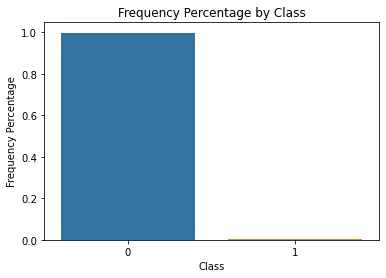

In [37]:
# Barplot graphic to show number of positive and negative cases are. 

count_classes = pd.value_counts(data['Class'], sort=True).sort_index()
ax = sns.barplot(x=count_classes.index, y=[tuple(count_classes/len(data))[0],tuple(count_classes/len(data))[1]])
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency Percentage')

## Model Preparation
#### <b>Step One</b> .- Split into training and Test Sets

We now have:
* A training set with 190,280 instantes (67% of the original dataset).
* A test set with 93,987 instances(33% of the original dataset).
* 0.17% of fraud percentage have been stratify for both the training and the test.

In [38]:
# Split the data in training and test sets
X_train, X_test, y_train, y_test = train_test_split(dataX,
                                                    dataY, test_size=0.33,
                                                    random_state=2018, stratify=dataY)

#### <b>Second Step</b> .- Select Cost Function

We'll use binary classification log loss. 

![Ecuation](pictures/binnary_log.png "Ecuation Binnary Log")

* N -> Number of observations
* M -> Numer of class labels

#### <b>Third Step</b>.- Create K-Fold Cross-Validation Sets

In [39]:
# Where k is 5

k_fold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=2018)

# <b>Machine Learning Models</b>

## <b>Model N° 1</b>: Logistic Regression

#### <b>First Step</b>.- Set hyperparameters

In [41]:
# Hyperparameters

penalty = 'l2' # L2 is the most stable option for this model instead  of the L1. 
C = 1.0 # C is the regularization strength. The smaller the value, the stronger the regularization.
class_weight = 'balanced' #To indicate we have an imbalanced class problem. The weights of the positive labels will be more heavy.
random_state = 2018 #set a random state to make it reproducible.
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C, 
            class_weight=class_weight, random_state=random_state, 
                            solver=solver, n_jobs=n_jobs)

#### <b>Second Step</b>.- Train the model

In [42]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])

model = logReg

for train_index, cv_index in k_fold.split(np.zeros(len(X_train))
                                          ,y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, 
                               model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, 
                         predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLogisticRegression = log_loss(y_train, 
                                     predictionsBasedOnKFolds.loc[:,1])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)

Training Log Loss:  0.10966432575191984
CV Log Loss:  0.10878917064684794
Training Log Loss:  0.10459171161510084
CV Log Loss:  0.10405418089351479
Training Log Loss:  0.11541962721808012
CV Log Loss:  0.11768428439354854
Training Log Loss:  0.11559214593681948
CV Log Loss:  0.11817690292867107
Training Log Loss:  0.09708261631063324
CV Log Loss:  0.09696319572687945
Logistic Regression Log Loss:  0.10913354691789236


#### <b>Third Step</b>.- Evaluate de Logistic Regression Model Precision

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.74')

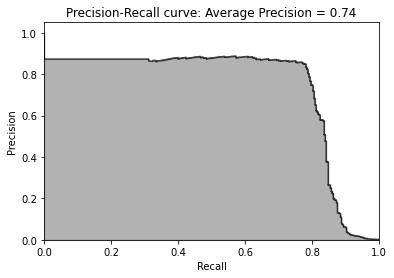

In [43]:
# Plot the Precision-Recall Curve
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))


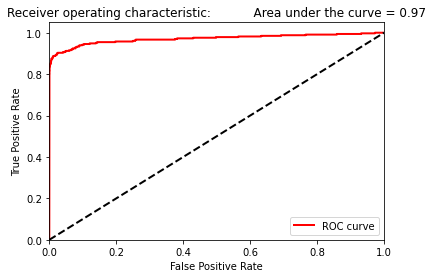

In [44]:
# Plot the auROC (Reveiver Operating Characteristic)
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## <b>Model N° 2</b>: Random Forests

#### <b>First Step</b>.- Set hyperparameters

In [45]:
n_estimators = 10 #numbers of trees
max_features = 'auto'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 2018
class_weight = 'balanced'

RFC = RandomForestClassifier(n_estimators=n_estimators, 
        max_features=max_features, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf, 
        max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap, 
        oob_score=oob_score, n_jobs=n_jobs, random_state=random_state, 
        class_weight=class_weight)

#### <b>Second Step</b>.- Train the Model

* K-fold cross-validation: 5 (4 for training and 1 for testing)

In [46]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])

model = RFC

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, \
                                model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossRandomForestsClassifier = log_loss(y_train, 
                                          predictionsBasedOnKFolds.loc[:,1])
print('Random Forests Log Loss: ', loglossRandomForestsClassifier)

Training Log Loss:  0.0004570758747246713
CV Log Loss:  0.009090797476425144
Training Log Loss:  0.0004101805310493279
CV Log Loss:  0.012640234648018377
Training Log Loss:  0.00040027341363592047
CV Log Loss:  0.009990776910341356
Training Log Loss:  0.0003894650263288808
CV Log Loss:  0.006620007375395402
Training Log Loss:  0.0004291016183715201
CV Log Loss:  0.01348243171548044
Random Forests Log Loss:  0.010364849625132141


#### <b>Third Step</b>.- Evaluate the model

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.79')

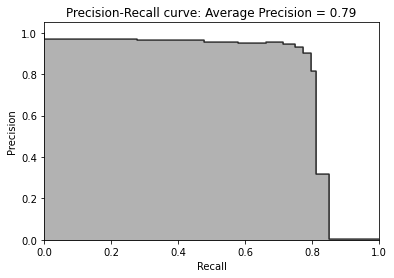

In [48]:
# First with the Plot of Precision-Recall Curve
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsRandomForests = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

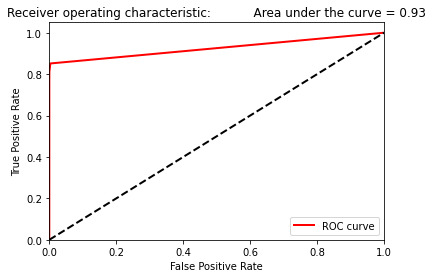

In [49]:
#  auROC plot
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(
          areaUnderROC))
plt.legend(loc="lower right")
plt.show()